<a href="https://colab.research.google.com/github/Silverflon-07/Rice-ML-2026/blob/main/Leo's_ML_Rice_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("fraudDataset.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.shape
df.columns
df['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


In [ ]:
#take the sum of the total number of null items
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
#drop all data points that have null values
df.dropna(inplace=True)
#inplace=True <-- a way of updating the df without having to assign back to df
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df.drop(['Unnamed: 0', 'cc_num', 'trans_num', 'first', 'last'], axis=1, inplace=True)
df.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [ ]:
#convert DOB to age
df['today'] = pd.to_datetime(df['dob'])
df['age'] = ((pd.to_datetime(df['today']) - df['dob']).dt.days/365.25).astype(int)
df.drop(['dob'], axis=1, inplace=True)
df.head()

,trans_date_trans_time,amt,city_pop,unix_time,merch_lat,merch_long,is_fraud,job_encoded,merchant_encoded,gender_F,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,zip_encoded,today,age
0,2019-01-01 00:00:18,4.97,3495,1325376018,36.011293,-82.048315,0,0.001693,0.014207,1,...,0,1,0,0,0,0,0,0.000000,1988-03-09,0
1,2019-01-01 00:00:44,107.23,149,1325376044,49.159047,-118.186462,0,0.002157,0.010787,1,...,0,0,0,0,0,0,0,0.000000,1978-06-21,0
2,2019-01-01 00:00:51,220.11,4154,1325376051,43.150704,-112.154481,0,0.015656,0.002111,0,...,0,0,0,0,0,0,0,0.000000,1962-01-19,0
3,2019-01-01 00:01:16,45.00,1939,1325376076,47.034331,-112.561071,0,0.007905,0.003444,0,...,0,0,0,0,0,0,0,0.030426,1967-01-12,0
4,2019-01-01 00:03:06,41.96,99,1325376186,38.674999,-78.632459,0,0.000000,0.003769,0,...,0,0,1,0,0,0,0,0.000000,1986-03-28,0


In [ ]:
df.drop('unix_time', axis=1, inplace=True)
df.head()

,trans_date_trans_time,amt,city_pop,merch_lat,merch_long,is_fraud,job_encoded,merchant_encoded,gender_F,gender_M,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,zip_encoded,today,age
0,2019-01-01 00:00:18,4.97,3495,36.011293,-82.048315,0,0.001693,0.014207,1,0,...,0,1,0,0,0,0,0,0.000000,1988-03-09,0
1,2019-01-01 00:00:44,107.23,149,49.159047,-118.186462,0,0.002157,0.010787,1,0,...,0,0,0,0,0,0,0,0.000000,1978-06-21,0
2,2019-01-01 00:00:51,220.11,4154,43.150704,-112.154481,0,0.015656,0.002111,0,1,...,0,0,0,0,0,0,0,0.000000,1962-01-19,0
3,2019-01-01 00:01:16,45.00,1939,47.034331,-112.561071,0,0.007905,0.003444,0,1,...,0,0,0,0,0,0,0,0.030426,1967-01-12,0
4,2019-01-01 00:03:06,41.96,99,38.674999,-78.632459,0,0.000000,0.003769,0,1,...,0,0,1,0,0,0,0,0.000000,1986-03-28,0


In [ ]:
#one-hot encoding only two types
df['gender'].value_counts()

df['category'].value_counts()
#target encoding too many trypes of jobs
df['job'].value_counts()

,count
category,
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758


In [ ]:
#do target encoding for job
target_mean = df.groupby('job')['is_fraud'].mean()

df['job_encoded'] = df['job'].map(target_mean)

#do target encoding for merchant
target_mean2 = df.groupby('merchant')['is_fraud'].mean()

df['merchant_encoded'] = df['merchant'].map(target_mean2)

df.drop(['job', 'merchant'], axis=1, inplace=True)
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,job_encoded,merchant_encoded
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,0.001693,0.014207
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,0.002157,0.010787
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,0.015656,0.002111
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,0.007905,0.003444
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,0.000000,0.003769


In [ ]:
#do one-hot encoding for gender and category with 0's
df = pd.get_dummies(df, columns = ['gender', 'category'], dtype=int)
df.head()

,trans_date_trans_time,amt,street,city,state,zip,lat,long,city_pop,dob,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,4.97,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,1988-03-09,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,1978-06-21,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,1962-01-19,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,45.00,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,1967-01-12,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,41.96,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,1986-03-28,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#looking into location
df.drop(['lat', 'long', 'street','city','state'], axis=1, inplace=True)
df.head()

,trans_date_trans_time,amt,zip,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,job_encoded,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,4.97,28654,3495,1988-03-09,1325376018,36.011293,-82.048315,0,0.001693,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,99160,149,1978-06-21,1325376044,49.159047,-118.186462,0,0.002157,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,83252,4154,1962-01-19,1325376051,43.150704,-112.154481,0,0.015656,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,45.00,59632,1939,1967-01-12,1325376076,47.034331,-112.561071,0,0.007905,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,41.96,24433,99,1986-03-28,1325376186,38.674999,-78.632459,0,0.000000,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
target_mean3 = df.groupby('zip')['is_fraud'].mean()

df['zip_encoded'] = df['zip'].map(target_mean3)

df.drop(['zip'], axis=1, inplace=True)
df.head()

,trans_date_trans_time,amt,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,job_encoded,merchant_encoded,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,zip_encoded
0,2019-01-01 00:00:18,4.97,3495,1988-03-09,1325376018,36.011293,-82.048315,0,0.001693,0.014207,...,0,0,0,1,0,0,0,0,0,0.000000
1,2019-01-01 00:00:44,107.23,149,1978-06-21,1325376044,49.159047,-118.186462,0,0.002157,0.010787,...,0,0,0,0,0,0,0,0,0,0.000000
2,2019-01-01 00:00:51,220.11,4154,1962-01-19,1325376051,43.150704,-112.154481,0,0.015656,0.002111,...,0,0,0,0,0,0,0,0,0,0.000000
3,2019-01-01 00:01:16,45.00,1939,1967-01-12,1325376076,47.034331,-112.561071,0,0.007905,0.003444,...,0,0,0,0,0,0,0,0,0,0.030426
4,2019-01-01 00:03:06,41.96,99,1986-03-28,1325376186,38.674999,-78.632459,0,0.000000,0.003769,...,0,0,0,0,1,0,0,0,0,0.000000


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(1037340, 26) (259335, 26)
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
is_fraud
0    0.994212
1    0.005788
Name: proportion, dtype: float64


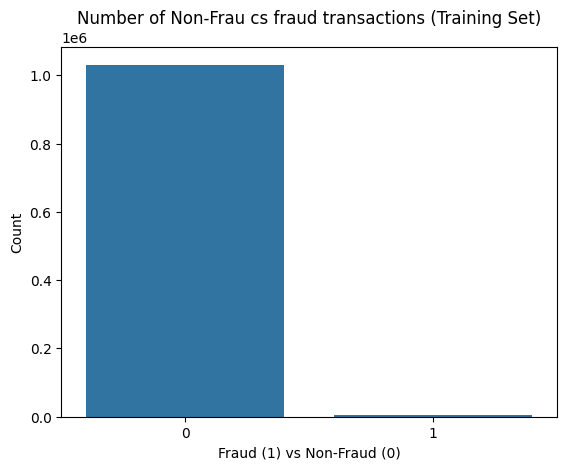

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train) #tells it to group by fraud vs non-fraud
plt.title("Number of Non-Frau cs fraud transactions (Training Set)")
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel(("Count"))
plt.show()

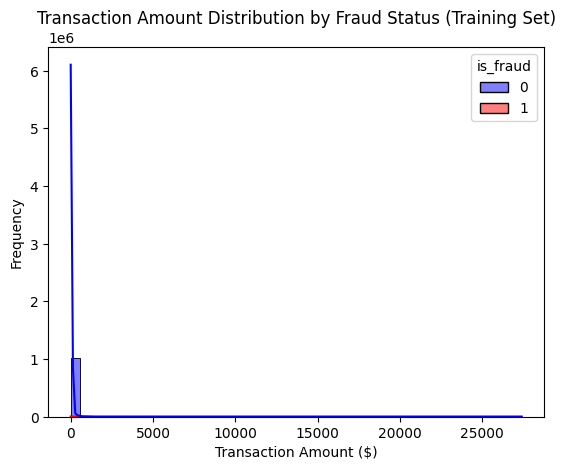

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(
    x=X_train['amt'],
    bins=50,
    hue=y_train,
    kde=True,
    palette = ['blue', 'red'],
    alpha = 0.5
    )
plt.title('Transaction Amount Distribution by Fraud Status (Training Set)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()

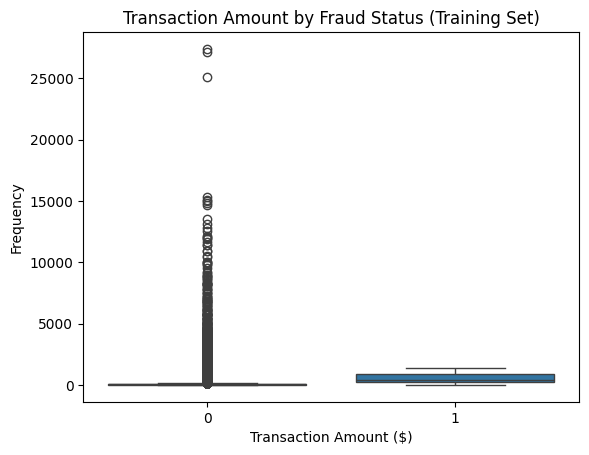

In [ ]:
sns.boxplot(x=y_train, y = X_train['amt'])
plt.title('Transaction Amount by Fraud Status (Training Set)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
fraud_by_cat = X_train.copy()
fraud_by_cat['is_fraud'] = y_train

fraud_rate_by_cat = fraud_by_cat.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraud_rate_by_cat.plot(kind = 'bar', color = 'Red')
plt.title('Fraud Rate by Merchant Category (Training Set)')
plt.xlabel('Merchant Category')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.show()

KeyError: 'category'

In [ ]:
fraud_by_state = X_train.copy()
fraud_by_state['is_fraud'] = y_train
#jot down this code later
top_states = fraud

In [ ]:

sns.histplot(
    data=X_train.assign(is_fraud=y_train),
    x='city_pop',
    bins=50,
    hue='is_fraud',
    element = 'step',
    stat = 'density'
    common_norm =
    kde=True,
    palette = ['blue', 'red'],
    alpha = 0.5
    )
plt.title('Transaction Amount Distribution by Fraud Status (Training Set)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()